In [1]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
def MR_create_Xb(X):
    N = X.shape[0]
    ones = np.ones([N, 1])
    Xb = np.hstack([ones, X])
    return Xb

In [3]:
def MR_find_W(X, Y):
    Xb = MR_create_Xb(X)
    front = inv(np.dot(Xb.T, Xb))
    back = np.dot(Xb.T, Y)
    W = np.dot(front, back)
    return W

In [4]:
def MR_find_Yhat(X, W):
    Xb = MR_create_Xb(X)
    Yhat = np.dot(Xb, W)
    return Yhat

In [15]:
def find_error(Y, Yhat):
    Error = ((Y - Yhat)**2).sum()
    return Error

In [7]:
Data = pd.read_csv('Data.csv')

In [8]:
DataMatrix = Data.values

In [17]:
D = DataMatrix.shape[1] - 1
X = DataMatrix[:, :D]
Y = DataMatrix[:, D:]

X_Train = X[:70, :]
Y_Train = Y[:70, :]

X_Test = X[70:, :]
Y_Test = Y[70:, :]

In [20]:
W = MR_find_W(X_Train, Y_Train)
Yhat_Train = MR_find_Yhat(X_Train, W)
error_Train = find_error(Y_Train, Yhat_Train)

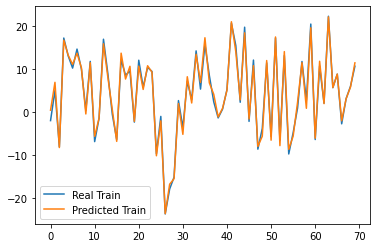

In [22]:
plt.plot(Y_Train, label='Real Train')
plt.plot(Yhat_Train, label='Predicted Train')
plt.legend()

In [23]:
error_Train

66.59816927219795

### Global model

In [24]:
Yhat_Test = MR_find_Yhat(X_Test, W)

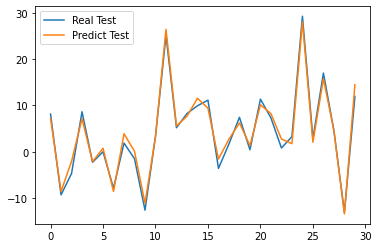

In [25]:
plt.plot(Y_Test, label='Real Test')
plt.plot(Yhat_Test, label='Predict Test')
plt.legend()

In [26]:
error_Test = find_error(Y_Test, Yhat_Test)
print(error_Test)

54.79803146978492


### Local model

In [34]:
def MR_find_W_local(epoch, lr, X, Y):
    Xb = MR_create_Xb(X)
    N = Xb.shape[0]
    D_1 = Xb.shape[1]
    W = np.random.randn(D_1, 1)
    error_list = []
    
    for i in range(epoch):
        Yhat = MR_find_Yhat(X, W)
        error = find_error(Y, Yhat)
        error_list.append(error)
        S = np.dot(Xb.T, Y-Yhat)
        W = W + (lr/N)*S
    return W, error_list

In [41]:
W, error_list = MR_find_W_local(1000, 0.1, X_Train, Y_Train)
Yhat_Train = MR_find_Yhat(X_Train, W)
error_Train = find_error(Y_Train, Yhat_Train)

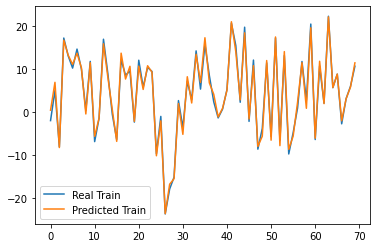

In [42]:
plt.plot(Y_Train, label='Real Train')
plt.plot(Yhat_Train, label='Predicted Train')
plt.legend()

In [43]:
print(error_Train)

66.59816927219798


In [44]:
error_list

[6139.767369556948,
 5024.708534368487,
 4144.476760123736,
 3445.023983413965,
 2885.3654183428403,
 2434.343115117894,
 2068.201127823892,
 1768.7675522064662,
 1522.0904947655588,
 1317.4137093706022,
 1146.4065154330292,
 1002.5841764554231,
 880.8710234274697,
 777.2706377189348,
 688.6163955621942,
 612.3823917617957,
 546.5397793050806,
 489.44731359514714,
 439.76769573477736,
 396.4034080494088,
 358.44730558983093,
 325.14440317000845,
 295.8621782465036,
 270.0673700791928,
 247.30775073921234,
 227.19771519746084,
 209.4068169829926,
 193.65058595108331,
 179.68312289483535,
 167.29108504636352,
 156.2887666500358,
 146.51404701497339,
 137.825030205889,
 130.09723988477757,
 123.22126282508762,
 117.10075757578359,
 111.65076237503362,
 106.79624999452338,
 102.4708877078058,
 98.61596875189298,
 95.179488042794,
 92.11533993016909,
 89.38261974953782,
 86.9450140921375,
 84.77026724471231,
 82.82971329314282,
 81.0978650410937,
 79.55205224930093,
 78.17210281551972,
 76.